## Breast Cancer detection with neural networks
This notebook contains an example of classification, using neural networks aiming to detect the severity of breast cancer on the dataset

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from pprint import pprint
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/rodrigo/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rodrigo/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rodrigo/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rodrigo/.local/lib/python3.6/site-packages/tensorflow/py

In [2]:
# Importing data
data_csv = "mamografy.csv"
dataframe = pd.read_csv(data_csv, header=None)
dataset = dataframe.values

# Normalize the dataset
start = 0
end = 5
norm_dataset = list()

for i in range(start, end):
    norm_col = dataset[:, i] / np.amax(dataset[:, i])
    norm_dataset.append(norm_col)

for i in range(end, end + 2):
    col = dataset[:, i]
    norm_dataset.append(col)

norm_dataset = pd.DataFrame(norm_dataset)
norm_dataset = norm_dataset.transpose()
norm_dataset = norm_dataset.values

dataset = norm_dataset

x = dataset[:, 0:5].astype(float)
y = dataset[:, 5:7]

In [3]:
# Spliting data
seed = 9
# Split data set into train and validation
x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.15, random_state=seed
)
# Split train into train and test
x_train, x_test, y_train, y_test = train_test_split(
    x_train, y_train, test_size=0.175, random_state=seed
)

In [4]:
# Dataset dataframe
class_1 = [len(np.where(y_train[:,0]==0)[0]),len(np.where(y_val[:,0]==0)[0]),len(np.where(y_test[:,0]==0)[0])]
class_1.append(np.sum(class_1))
class_2 = [len(np.where(y_train[:,0]==1)[0]),len(np.where(y_val[:,0]==1)[0]),len(np.where(y_test[:,0]==1)[0])]
class_2.append(np.sum(class_2))
total   = [len(y_train[:,0]),len(y_val[:,0]),len(y_test[:,0])]
total.append(np.sum(total))

table_df = {'Lote de dados': ['Treino','Validação','Teste','Total'],'Porcentagem':[60,20,20,100], 'Classe 1': class_1,'Classe 2': class_2,'Total':total}
table_df = pd.DataFrame(data=table_df)
table_df.to_csv('divisão_de_dados')


In [5]:
# Building the NN
lr = 0.001  # learning rate
lr_decay = 0.0005# learning rate decay
n_mini_batch = 100  # mini-batch length
activation_fcn = "sigmoid"
optimizer = Adam(lr=lr, decay=lr_decay)
input_dim = x.shape[1]
h_n = 30
model = Sequential()
model.add(Dense(h_n, input_dim=input_dim, activation=activation_fcn))
model.add(Dense(1, activation="linear"))

# Compile model
model.compile(loss="mse", optimizer=optimizer, metrics=["accuracy"])

# Train and validate the model
history = model.fit(
    x_train,
    y_train[:, 0],
    validation_data=(x_val, y_val[:, 0]),
    epochs=200,
    batch_size=50,
    # verbose=0,
    callbacks=[
        EarlyStopping(
            monitor="val_loss", mode="min", min_delta=0.001, patience=20, verbose=1
        )
    ],
)

pred = model.predict(x_test)
pred = np.array(pred).flatten()
erro = pred - np.array(y_test[:, 0]).flatten()
erro = np.abs(erro)

acerto = 0
for i in erro:
    if i < 0.5:
        acerto += 1

best_pred = pred







Train on 584 samples, validate on 126 samples
Epoch 1/200
584/584 [==============================] - 1s 2ms/step - loss: 2.9471 - acc: 0.0000e+00 - val_loss: 2.4478 - val_acc: 0.0000e+00
Epoch 2/200
584/584 [==============================] - 0s 34us/step - loss: 2.1683 - acc: 0.0000e+00 - val_loss: 1.7654 - val_acc: 0.0000e+00
Epoch 3/200
584/584 [==============================] - 0s 34us/step - loss: 1.5570 - acc: 0.0017 - val_loss: 1.2458 - val_acc: 0.0476
Epoch 4/200
584/584 [==============================] - 0s 34us/step - loss: 1.0930 - acc: 0.3459 - val_loss: 0.8717 - val_acc: 0.5317
Epoch 5/200
584/584 [==============================] - 0s 32us/step - loss: 0.7660 - acc: 0.5154 - val_loss: 0.6093 - val_acc: 0.5317
Epoch 6/200
584/584 [==============================] - 0s 35us/step - loss: 0.5425 - acc: 0.5154 - val_loss: 0.4368 - val_acc: 0.5317
Epoch 7/200
584/584 [==============================] - 0s 34us/step - loss: 0.3962 - acc: 0.5154 - val_loss: 0.3297 - val_acc: 0.

584/584 [==============================] - 0s 33us/step - loss: 0.1783 - acc: 0.7894 - val_loss: 0.1697 - val_acc: 0.8095
Epoch 53/200
584/584 [==============================] - 0s 34us/step - loss: 0.1777 - acc: 0.7928 - val_loss: 0.1690 - val_acc: 0.8095
Epoch 54/200
584/584 [==============================] - 0s 32us/step - loss: 0.1772 - acc: 0.7911 - val_loss: 0.1684 - val_acc: 0.8095
Epoch 55/200
584/584 [==============================] - 0s 34us/step - loss: 0.1767 - acc: 0.7962 - val_loss: 0.1677 - val_acc: 0.8016
Epoch 56/200
584/584 [==============================] - 0s 33us/step - loss: 0.1761 - acc: 0.7945 - val_loss: 0.1671 - val_acc: 0.8095
Epoch 57/200
584/584 [==============================] - 0s 33us/step - loss: 0.1755 - acc: 0.7945 - val_loss: 0.1665 - val_acc: 0.8095
Epoch 58/200
584/584 [==============================] - 0s 32us/step - loss: 0.1750 - acc: 0.7928 - val_loss: 0.1659 - val_acc: 0.8095
Epoch 59/200
584/584 [==============================] - 0s 34us/step

Epoch 113/200
584/584 [==============================] - 0s 32us/step - loss: 0.1557 - acc: 0.7945 - val_loss: 0.1446 - val_acc: 0.8175
Epoch 114/200
584/584 [==============================] - 0s 47us/step - loss: 0.1557 - acc: 0.7962 - val_loss: 0.1445 - val_acc: 0.8095
Epoch 115/200
584/584 [==============================] - 0s 53us/step - loss: 0.1556 - acc: 0.7962 - val_loss: 0.1442 - val_acc: 0.8175
Epoch 116/200
584/584 [==============================] - 0s 49us/step - loss: 0.1551 - acc: 0.7962 - val_loss: 0.1440 - val_acc: 0.8175
Epoch 117/200
584/584 [==============================] - 0s 49us/step - loss: 0.1549 - acc: 0.7962 - val_loss: 0.1438 - val_acc: 0.8175
Epoch 118/200
584/584 [==============================] - 0s 55us/step - loss: 0.1548 - acc: 0.7962 - val_loss: 0.1437 - val_acc: 0.8175
Epoch 119/200
584/584 [==============================] - 0s 54us/step - loss: 0.1545 - acc: 0.7945 - val_loss: 0.1434 - val_acc: 0.8175
Epoch 120/200
584/584 [=========================

584/584 [==============================] - 0s 34us/step - loss: 0.1485 - acc: 0.7945 - val_loss: 0.1377 - val_acc: 0.8175
Epoch 174/200
584/584 [==============================] - 0s 34us/step - loss: 0.1484 - acc: 0.7945 - val_loss: 0.1377 - val_acc: 0.8175
Epoch 175/200
584/584 [==============================] - 0s 36us/step - loss: 0.1484 - acc: 0.7979 - val_loss: 0.1378 - val_acc: 0.8175
Epoch 176/200
584/584 [==============================] - 0s 40us/step - loss: 0.1483 - acc: 0.8014 - val_loss: 0.1377 - val_acc: 0.8175
Epoch 177/200
584/584 [==============================] - 0s 33us/step - loss: 0.1482 - acc: 0.7945 - val_loss: 0.1375 - val_acc: 0.8175
Epoch 178/200
584/584 [==============================] - 0s 35us/step - loss: 0.1481 - acc: 0.7945 - val_loss: 0.1375 - val_acc: 0.8175
Epoch 179/200
584/584 [==============================] - 0s 34us/step - loss: 0.1480 - acc: 0.7945 - val_loss: 0.1374 - val_acc: 0.8175
Epoch 180/200
584/584 [==============================] - 0s 34

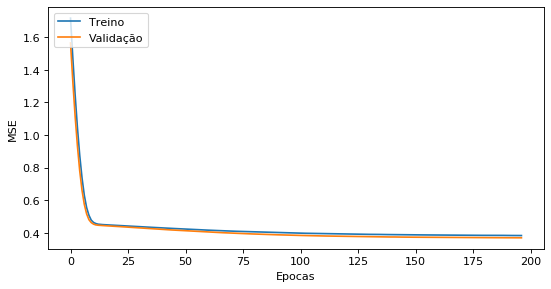

In [6]:
# Plot the validation and train loss
plt.figure(figsize=(8, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(np.sqrt(history.history["loss"]))
plt.plot(np.sqrt(history.history["val_loss"]))
plt.ylabel("MSE")
plt.xlabel("Epocas")
plt.legend(["Treino", "Validação"], loc="upper left")
plt.show()

In [7]:
def get_confusion_matrix(reais, preditos, labels):
    """
    Uma função que retorna a matriz de confusão para uma classificação binária
    
    Args:
        reais (list): lista de valores reais
        preditos (list): lista de valores preditos pelo modelos
        labels (list): lista de labels a serem avaliados.
            É importante que ela esteja presente, pois usaremos ela para entender
            quem é a classe positiva e quem é a classe negativa
    
    Returns:
        Um numpy.array, no formato:
            numpy.array([
                [ tp, fp ],
                [ fn, tn ]
            ])
    """
    # não implementado
    if len(labels) > 2:
        return None

    if len(reais) != len(preditos):
        return None
    
    # considerando a primeira classe como a positiva, e a segunda a negativa
    true_class = labels[0]
    negative_class = labels[1]

    # valores preditos corretamente
    tp = 0
    tn = 0
    
    # valores preditos incorretamente
    fp = 0
    fn = 0
    
    for (indice, v_real) in enumerate(reais):
        v_predito = preditos[indice]

        # se trata de um valor real da classe positiva
        if v_real == true_class:
            tp += 1 if v_predito == v_real else 0
            fp += 1 if v_predito != v_real else 0
        else:
            tn += 1 if v_predito == v_real else 0
            fn += 1 if v_predito != v_real else 0
    
    return np.array([
        # valores da classe positiva
        [ tp, fp ],
        # valores da classe negativa
        [ fn, tn ]
    ])

## Confusion Matrix

In [8]:
valores_reais = np.array(y_test[:,0],dtype=int).flatten()
valores_preditos = np.array(np.round(pred),dtype=int).flatten()
matrix = get_confusion_matrix(reais=valores_reais, preditos=valores_preditos, labels=[1,0])
matrix_df = {'True_positive': matrix[0]}
print(matrix)

[[54  8]
 [14 48]]


## Finding out the best number of neurons on the hidden layer

In [9]:
# Testing different number of neurons
neurons = [5,10,15,30]
repetitions = 2
result = list()
for neuron in neurons:
    result_i = list()
    for i in range(0,repetitions):
        lr = 0.001  # learning rate
        lr_decay = 0.0005# learning rate decay
        n_mini_batch = 100  # mini-batch length
        activation_fcn = "sigmoid"
        optimizer = Adam(lr=lr, decay=lr_decay)
        input_dim = x.shape[1]
        h_n = neuron
        model = Sequential()
        model.add(Dense(h_n, input_dim=input_dim, activation=activation_fcn))
        model.add(Dense(1, activation="linear"))

        # Compile model
        model.compile(loss="mse", optimizer=optimizer, metrics=["accuracy"])

        # Train and validate the model
        history = model.fit(
            x_train,
            y_train[:, 0],
            validation_data=(x_val, y_val[:, 0]),
            epochs=200,
            batch_size=30,
            # verbose=0,
            callbacks=[
                EarlyStopping(
                    monitor="val_loss", mode="min", min_delta=0.001, patience=20, verbose=1
                )
            ],
        )
        pred = model.predict(x_test)
        pred = np.array(pred).flatten()

        erro = pred - np.array(y_test[:, 0]).flatten()
        erro = np.abs(erro)

        acerto = 0
        for i in erro:
            if i < 0.5:
                acerto += 1

        result_i.append(acerto)
    result.append(result_i)

Train on 584 samples, validate on 126 samples
Epoch 1/200
584/584 [==============================] - 0s 348us/step - loss: 0.3051 - acc: 0.4486 - val_loss: 0.2944 - val_acc: 0.3016
Epoch 2/200
584/584 [==============================] - 0s 53us/step - loss: 0.2909 - acc: 0.2568 - val_loss: 0.2881 - val_acc: 0.2302
Epoch 3/200
584/584 [==============================] - 0s 55us/step - loss: 0.2847 - acc: 0.2568 - val_loss: 0.2830 - val_acc: 0.2381
Epoch 4/200
584/584 [==============================] - 0s 53us/step - loss: 0.2802 - acc: 0.2842 - val_loss: 0.2784 - val_acc: 0.2778
Epoch 5/200
584/584 [==============================] - 0s 55us/step - loss: 0.2758 - acc: 0.2997 - val_loss: 0.2733 - val_acc: 0.2778
Epoch 6/200
584/584 [==============================] - 0s 54us/step - loss: 0.2716 - acc: 0.2979 - val_loss: 0.2685 - val_acc: 0.2778
Epoch 7/200
584/584 [==============================] - 0s 53us/step - loss: 0.2676 - acc: 0.3099 - val_loss: 0.2640 - val_acc: 0.2937
Epoch 8/200
584

584/584 [==============================] - 0s 55us/step - loss: 0.1722 - acc: 0.7825 - val_loss: 0.1569 - val_acc: 0.8175
Epoch 62/200
584/584 [==============================] - 0s 55us/step - loss: 0.1715 - acc: 0.7825 - val_loss: 0.1562 - val_acc: 0.8175
Epoch 63/200
584/584 [==============================] - 0s 53us/step - loss: 0.1709 - acc: 0.7808 - val_loss: 0.1556 - val_acc: 0.8175
Epoch 64/200
584/584 [==============================] - 0s 56us/step - loss: 0.1704 - acc: 0.7842 - val_loss: 0.1549 - val_acc: 0.8175
Epoch 65/200
584/584 [==============================] - 0s 53us/step - loss: 0.1700 - acc: 0.7825 - val_loss: 0.1543 - val_acc: 0.8175
Epoch 66/200
584/584 [==============================] - 0s 54us/step - loss: 0.1691 - acc: 0.7877 - val_loss: 0.1537 - val_acc: 0.8175
Epoch 67/200
584/584 [==============================] - 0s 52us/step - loss: 0.1686 - acc: 0.7877 - val_loss: 0.1531 - val_acc: 0.8175
Epoch 68/200
584/584 [==============================] - 0s 55us/step

584/584 [==============================] - 0s 53us/step - loss: 0.1540 - acc: 0.7911 - val_loss: 0.1383 - val_acc: 0.8095
Epoch 122/200
584/584 [==============================] - 0s 55us/step - loss: 0.1541 - acc: 0.7894 - val_loss: 0.1382 - val_acc: 0.8095
Epoch 123/200
584/584 [==============================] - 0s 61us/step - loss: 0.1539 - acc: 0.7894 - val_loss: 0.1382 - val_acc: 0.8095
Epoch 124/200
584/584 [==============================] - 0s 54us/step - loss: 0.1538 - acc: 0.7894 - val_loss: 0.1380 - val_acc: 0.8095
Epoch 125/200
584/584 [==============================] - 0s 59us/step - loss: 0.1539 - acc: 0.7911 - val_loss: 0.1382 - val_acc: 0.8095
Epoch 126/200
584/584 [==============================] - 0s 59us/step - loss: 0.1535 - acc: 0.7894 - val_loss: 0.1379 - val_acc: 0.8095
Epoch 127/200
584/584 [==============================] - 0s 64us/step - loss: 0.1534 - acc: 0.7894 - val_loss: 0.1377 - val_acc: 0.8095
Epoch 128/200
584/584 [==============================] - 0s 63

Epoch 9/200
584/584 [==============================] - 0s 55us/step - loss: 0.2014 - acc: 0.7842 - val_loss: 0.1912 - val_acc: 0.8333
Epoch 10/200
584/584 [==============================] - 0s 52us/step - loss: 0.2002 - acc: 0.7877 - val_loss: 0.1898 - val_acc: 0.8254
Epoch 11/200
584/584 [==============================] - 0s 54us/step - loss: 0.1993 - acc: 0.7808 - val_loss: 0.1884 - val_acc: 0.8254
Epoch 12/200
584/584 [==============================] - 0s 54us/step - loss: 0.1978 - acc: 0.7860 - val_loss: 0.1872 - val_acc: 0.8333
Epoch 13/200
584/584 [==============================] - 0s 60us/step - loss: 0.1968 - acc: 0.7894 - val_loss: 0.1859 - val_acc: 0.8254
Epoch 14/200
584/584 [==============================] - 0s 54us/step - loss: 0.1956 - acc: 0.7877 - val_loss: 0.1845 - val_acc: 0.8333
Epoch 15/200
584/584 [==============================] - 0s 53us/step - loss: 0.1944 - acc: 0.7877 - val_loss: 0.1831 - val_acc: 0.8333
Epoch 16/200
584/584 [==============================] - 

Epoch 70/200
584/584 [==============================] - 0s 54us/step - loss: 0.1580 - acc: 0.7962 - val_loss: 0.1425 - val_acc: 0.8095
Epoch 71/200
584/584 [==============================] - 0s 53us/step - loss: 0.1578 - acc: 0.7945 - val_loss: 0.1423 - val_acc: 0.8095
Epoch 72/200
584/584 [==============================] - 0s 54us/step - loss: 0.1574 - acc: 0.7962 - val_loss: 0.1419 - val_acc: 0.8095
Epoch 73/200
584/584 [==============================] - 0s 54us/step - loss: 0.1572 - acc: 0.7945 - val_loss: 0.1416 - val_acc: 0.8095
Epoch 74/200
584/584 [==============================] - 0s 56us/step - loss: 0.1572 - acc: 0.7962 - val_loss: 0.1415 - val_acc: 0.8095
Epoch 75/200
584/584 [==============================] - 0s 54us/step - loss: 0.1566 - acc: 0.7962 - val_loss: 0.1411 - val_acc: 0.8095
Epoch 76/200
584/584 [==============================] - 0s 58us/step - loss: 0.1566 - acc: 0.7928 - val_loss: 0.1409 - val_acc: 0.8095
Epoch 77/200
584/584 [==============================] -

584/584 [==============================] - 0s 53us/step - loss: 0.1490 - acc: 0.7997 - val_loss: 0.1347 - val_acc: 0.8095
Epoch 131/200
584/584 [==============================] - 0s 58us/step - loss: 0.1490 - acc: 0.7979 - val_loss: 0.1346 - val_acc: 0.8095
Epoch 132/200
584/584 [==============================] - 0s 51us/step - loss: 0.1490 - acc: 0.7979 - val_loss: 0.1347 - val_acc: 0.8095
Epoch 133/200
584/584 [==============================] - 0s 53us/step - loss: 0.1488 - acc: 0.7979 - val_loss: 0.1346 - val_acc: 0.8095
Epoch 134/200
584/584 [==============================] - 0s 54us/step - loss: 0.1488 - acc: 0.7979 - val_loss: 0.1344 - val_acc: 0.8095
Epoch 135/200
584/584 [==============================] - 0s 54us/step - loss: 0.1487 - acc: 0.7997 - val_loss: 0.1345 - val_acc: 0.8095
Epoch 136/200
584/584 [==============================] - 0s 54us/step - loss: 0.1486 - acc: 0.7997 - val_loss: 0.1343 - val_acc: 0.8095
Epoch 137/200
584/584 [==============================] - 0s 52

584/584 [==============================] - 0s 54us/step - loss: 0.1691 - acc: 0.7962 - val_loss: 0.1566 - val_acc: 0.8175
Epoch 42/200
584/584 [==============================] - 0s 54us/step - loss: 0.1683 - acc: 0.7945 - val_loss: 0.1555 - val_acc: 0.8175
Epoch 43/200
584/584 [==============================] - 0s 54us/step - loss: 0.1674 - acc: 0.7962 - val_loss: 0.1546 - val_acc: 0.8175
Epoch 44/200
584/584 [==============================] - 0s 58us/step - loss: 0.1663 - acc: 0.7945 - val_loss: 0.1536 - val_acc: 0.8175
Epoch 45/200
584/584 [==============================] - 0s 57us/step - loss: 0.1654 - acc: 0.7911 - val_loss: 0.1526 - val_acc: 0.8175
Epoch 46/200
584/584 [==============================] - 0s 59us/step - loss: 0.1646 - acc: 0.7945 - val_loss: 0.1516 - val_acc: 0.8175
Epoch 47/200
584/584 [==============================] - 0s 57us/step - loss: 0.1639 - acc: 0.7945 - val_loss: 0.1507 - val_acc: 0.8175
Epoch 48/200
584/584 [==============================] - 0s 55us/step

Epoch 102/200
584/584 [==============================] - 0s 54us/step - loss: 0.1475 - acc: 0.8048 - val_loss: 0.1347 - val_acc: 0.8175
Epoch 103/200
584/584 [==============================] - 0s 54us/step - loss: 0.1469 - acc: 0.7997 - val_loss: 0.1344 - val_acc: 0.8175
Epoch 104/200
584/584 [==============================] - 0s 55us/step - loss: 0.1469 - acc: 0.7962 - val_loss: 0.1343 - val_acc: 0.8175
Epoch 105/200
584/584 [==============================] - 0s 56us/step - loss: 0.1470 - acc: 0.7962 - val_loss: 0.1343 - val_acc: 0.8175
Epoch 106/200
584/584 [==============================] - 0s 55us/step - loss: 0.1468 - acc: 0.7962 - val_loss: 0.1342 - val_acc: 0.8175
Epoch 107/200
584/584 [==============================] - 0s 54us/step - loss: 0.1467 - acc: 0.7962 - val_loss: 0.1342 - val_acc: 0.8175
Epoch 108/200
584/584 [==============================] - 0s 54us/step - loss: 0.1467 - acc: 0.7997 - val_loss: 0.1342 - val_acc: 0.8175
Epoch 109/200
584/584 [=========================

Epoch 19/200
584/584 [==============================] - 0s 54us/step - loss: 0.2052 - acc: 0.7945 - val_loss: 0.1994 - val_acc: 0.8095
Epoch 20/200
584/584 [==============================] - 0s 55us/step - loss: 0.2044 - acc: 0.7979 - val_loss: 0.1982 - val_acc: 0.8175
Epoch 21/200
584/584 [==============================] - 0s 54us/step - loss: 0.2036 - acc: 0.7877 - val_loss: 0.1972 - val_acc: 0.8175
Epoch 22/200
584/584 [==============================] - 0s 53us/step - loss: 0.2022 - acc: 0.7911 - val_loss: 0.1959 - val_acc: 0.8175
Epoch 23/200
584/584 [==============================] - 0s 55us/step - loss: 0.2012 - acc: 0.7911 - val_loss: 0.1947 - val_acc: 0.8095
Epoch 24/200
584/584 [==============================] - 0s 53us/step - loss: 0.2004 - acc: 0.7979 - val_loss: 0.1936 - val_acc: 0.8095
Epoch 25/200
584/584 [==============================] - 0s 63us/step - loss: 0.1996 - acc: 0.7911 - val_loss: 0.1926 - val_acc: 0.8175
Epoch 26/200
584/584 [==============================] -

Epoch 80/200
584/584 [==============================] - 0s 63us/step - loss: 0.1622 - acc: 0.7894 - val_loss: 0.1497 - val_acc: 0.8175
Epoch 81/200
584/584 [==============================] - 0s 55us/step - loss: 0.1619 - acc: 0.7877 - val_loss: 0.1494 - val_acc: 0.8175
Epoch 82/200
584/584 [==============================] - 0s 55us/step - loss: 0.1615 - acc: 0.7894 - val_loss: 0.1490 - val_acc: 0.8175
Epoch 83/200
584/584 [==============================] - 0s 57us/step - loss: 0.1613 - acc: 0.7911 - val_loss: 0.1487 - val_acc: 0.8175
Epoch 84/200
584/584 [==============================] - 0s 53us/step - loss: 0.1609 - acc: 0.7911 - val_loss: 0.1483 - val_acc: 0.8175
Epoch 85/200
584/584 [==============================] - 0s 55us/step - loss: 0.1606 - acc: 0.7894 - val_loss: 0.1479 - val_acc: 0.8175
Epoch 86/200
584/584 [==============================] - 0s 83us/step - loss: 0.1603 - acc: 0.7877 - val_loss: 0.1476 - val_acc: 0.8175
Epoch 87/200
584/584 [==============================] -

584/584 [==============================] - 0s 56us/step - loss: 0.1510 - acc: 0.7945 - val_loss: 0.1383 - val_acc: 0.8175
Epoch 141/200
584/584 [==============================] - 0s 54us/step - loss: 0.1508 - acc: 0.7945 - val_loss: 0.1382 - val_acc: 0.8175
Epoch 142/200
584/584 [==============================] - 0s 56us/step - loss: 0.1510 - acc: 0.7962 - val_loss: 0.1382 - val_acc: 0.8175
Epoch 143/200
584/584 [==============================] - 0s 59us/step - loss: 0.1508 - acc: 0.7962 - val_loss: 0.1380 - val_acc: 0.8175
Epoch 144/200
584/584 [==============================] - 0s 67us/step - loss: 0.1509 - acc: 0.7945 - val_loss: 0.1381 - val_acc: 0.8175
Epoch 145/200
584/584 [==============================] - 0s 55us/step - loss: 0.1504 - acc: 0.7928 - val_loss: 0.1379 - val_acc: 0.8175
Epoch 146/200
584/584 [==============================] - 0s 54us/step - loss: 0.1504 - acc: 0.7962 - val_loss: 0.1378 - val_acc: 0.8175
Epoch 147/200
584/584 [==============================] - 0s 54

584/584 [==============================] - 0s 58us/step - loss: 0.1872 - acc: 0.7911 - val_loss: 0.1754 - val_acc: 0.8095
Epoch 24/200
584/584 [==============================] - 0s 56us/step - loss: 0.1859 - acc: 0.7894 - val_loss: 0.1739 - val_acc: 0.8254
Epoch 25/200
584/584 [==============================] - 0s 54us/step - loss: 0.1848 - acc: 0.7928 - val_loss: 0.1728 - val_acc: 0.8175
Epoch 26/200
584/584 [==============================] - 0s 54us/step - loss: 0.1837 - acc: 0.7911 - val_loss: 0.1714 - val_acc: 0.8254
Epoch 27/200
584/584 [==============================] - 0s 54us/step - loss: 0.1825 - acc: 0.7928 - val_loss: 0.1703 - val_acc: 0.8254
Epoch 28/200
584/584 [==============================] - 0s 54us/step - loss: 0.1814 - acc: 0.7928 - val_loss: 0.1691 - val_acc: 0.8254
Epoch 29/200
584/584 [==============================] - 0s 56us/step - loss: 0.1804 - acc: 0.7928 - val_loss: 0.1679 - val_acc: 0.8254
Epoch 30/200
584/584 [==============================] - 0s 56us/step

Epoch 84/200
584/584 [==============================] - 0s 55us/step - loss: 0.1524 - acc: 0.7928 - val_loss: 0.1394 - val_acc: 0.8095
Epoch 85/200
584/584 [==============================] - 0s 55us/step - loss: 0.1522 - acc: 0.7928 - val_loss: 0.1393 - val_acc: 0.8095
Epoch 86/200
584/584 [==============================] - 0s 55us/step - loss: 0.1524 - acc: 0.7945 - val_loss: 0.1394 - val_acc: 0.8095
Epoch 87/200
584/584 [==============================] - 0s 56us/step - loss: 0.1519 - acc: 0.7928 - val_loss: 0.1389 - val_acc: 0.8095
Epoch 88/200
584/584 [==============================] - 0s 56us/step - loss: 0.1517 - acc: 0.7928 - val_loss: 0.1389 - val_acc: 0.8095
Epoch 89/200
584/584 [==============================] - 0s 57us/step - loss: 0.1516 - acc: 0.7928 - val_loss: 0.1387 - val_acc: 0.8095
Epoch 90/200
584/584 [==============================] - 0s 55us/step - loss: 0.1514 - acc: 0.7911 - val_loss: 0.1388 - val_acc: 0.8095
Epoch 91/200
584/584 [==============================] -

584/584 [==============================] - 0s 56us/step - loss: 0.1456 - acc: 0.7979 - val_loss: 0.1345 - val_acc: 0.8095
Epoch 145/200
584/584 [==============================] - 0s 54us/step - loss: 0.1454 - acc: 0.7979 - val_loss: 0.1345 - val_acc: 0.8095
Epoch 146/200
584/584 [==============================] - 0s 55us/step - loss: 0.1454 - acc: 0.8014 - val_loss: 0.1347 - val_acc: 0.8095
Epoch 147/200
584/584 [==============================] - 0s 56us/step - loss: 0.1452 - acc: 0.8014 - val_loss: 0.1345 - val_acc: 0.8095
Epoch 148/200
584/584 [==============================] - 0s 56us/step - loss: 0.1453 - acc: 0.7979 - val_loss: 0.1344 - val_acc: 0.8095
Epoch 149/200
584/584 [==============================] - 0s 55us/step - loss: 0.1450 - acc: 0.7979 - val_loss: 0.1346 - val_acc: 0.8095
Epoch 150/200
584/584 [==============================] - 0s 54us/step - loss: 0.1450 - acc: 0.7997 - val_loss: 0.1345 - val_acc: 0.8095
Epoch 151/200
584/584 [==============================] - 0s 53

584/584 [==============================] - 0s 56us/step - loss: 0.1788 - acc: 0.8065 - val_loss: 0.1689 - val_acc: 0.8254
Epoch 54/200
584/584 [==============================] - 0s 55us/step - loss: 0.1777 - acc: 0.7997 - val_loss: 0.1678 - val_acc: 0.8254
Epoch 55/200
584/584 [==============================] - 0s 54us/step - loss: 0.1768 - acc: 0.7979 - val_loss: 0.1667 - val_acc: 0.8254
Epoch 56/200
584/584 [==============================] - 0s 57us/step - loss: 0.1761 - acc: 0.8031 - val_loss: 0.1656 - val_acc: 0.8254
Epoch 57/200
584/584 [==============================] - 0s 55us/step - loss: 0.1749 - acc: 0.8031 - val_loss: 0.1646 - val_acc: 0.8254
Epoch 58/200
584/584 [==============================] - 0s 54us/step - loss: 0.1741 - acc: 0.8031 - val_loss: 0.1636 - val_acc: 0.8254
Epoch 59/200
584/584 [==============================] - 0s 56us/step - loss: 0.1732 - acc: 0.8031 - val_loss: 0.1626 - val_acc: 0.8254
Epoch 60/200
584/584 [==============================] - 0s 56us/step

584/584 [==============================] - 0s 54us/step - loss: 0.1496 - acc: 0.7962 - val_loss: 0.1367 - val_acc: 0.8254
Epoch 114/200
584/584 [==============================] - 0s 55us/step - loss: 0.1497 - acc: 0.7997 - val_loss: 0.1367 - val_acc: 0.8254
Epoch 115/200
584/584 [==============================] - 0s 55us/step - loss: 0.1493 - acc: 0.7979 - val_loss: 0.1364 - val_acc: 0.8254
Epoch 116/200
584/584 [==============================] - 0s 56us/step - loss: 0.1493 - acc: 0.7979 - val_loss: 0.1363 - val_acc: 0.8254
Epoch 117/200
584/584 [==============================] - 0s 56us/step - loss: 0.1493 - acc: 0.7979 - val_loss: 0.1360 - val_acc: 0.8254
Epoch 118/200
584/584 [==============================] - 0s 57us/step - loss: 0.1489 - acc: 0.7979 - val_loss: 0.1360 - val_acc: 0.8254
Epoch 119/200
584/584 [==============================] - 0s 56us/step - loss: 0.1488 - acc: 0.7979 - val_loss: 0.1358 - val_acc: 0.8254
Epoch 120/200
584/584 [==============================] - 0s 57

584/584 [==============================] - 0s 56us/step - loss: 0.1754 - acc: 0.7894 - val_loss: 0.1602 - val_acc: 0.8254
Epoch 13/200
584/584 [==============================] - 0s 57us/step - loss: 0.1720 - acc: 0.7911 - val_loss: 0.1568 - val_acc: 0.8254
Epoch 14/200
584/584 [==============================] - 0s 56us/step - loss: 0.1693 - acc: 0.7928 - val_loss: 0.1540 - val_acc: 0.8254
Epoch 15/200
584/584 [==============================] - 0s 55us/step - loss: 0.1671 - acc: 0.7928 - val_loss: 0.1516 - val_acc: 0.8254
Epoch 16/200
584/584 [==============================] - 0s 57us/step - loss: 0.1648 - acc: 0.7911 - val_loss: 0.1489 - val_acc: 0.8175
Epoch 17/200
584/584 [==============================] - 0s 57us/step - loss: 0.1626 - acc: 0.7979 - val_loss: 0.1470 - val_acc: 0.8254
Epoch 18/200
584/584 [==============================] - 0s 58us/step - loss: 0.1606 - acc: 0.7928 - val_loss: 0.1451 - val_acc: 0.8254
Epoch 19/200
584/584 [==============================] - 0s 54us/step

Epoch 73/200
584/584 [==============================] - 0s 58us/step - loss: 0.1410 - acc: 0.8116 - val_loss: 0.1296 - val_acc: 0.8254
Epoch 74/200
584/584 [==============================] - 0s 62us/step - loss: 0.1407 - acc: 0.8151 - val_loss: 0.1295 - val_acc: 0.8254
Epoch 75/200
584/584 [==============================] - 0s 56us/step - loss: 0.1404 - acc: 0.8134 - val_loss: 0.1295 - val_acc: 0.8254
Epoch 76/200
584/584 [==============================] - 0s 57us/step - loss: 0.1405 - acc: 0.8168 - val_loss: 0.1294 - val_acc: 0.8254
Epoch 77/200
584/584 [==============================] - 0s 53us/step - loss: 0.1402 - acc: 0.8134 - val_loss: 0.1294 - val_acc: 0.8254
Epoch 78/200
584/584 [==============================] - 0s 57us/step - loss: 0.1405 - acc: 0.8151 - val_loss: 0.1293 - val_acc: 0.8254
Epoch 79/200
584/584 [==============================] - 0s 56us/step - loss: 0.1401 - acc: 0.8134 - val_loss: 0.1296 - val_acc: 0.8254
Epoch 80/200
584/584 [==============================] -

584/584 [==============================] - 0s 56us/step - loss: 0.1576 - acc: 0.7945 - val_loss: 0.1464 - val_acc: 0.8254
Epoch 51/200
584/584 [==============================] - 0s 55us/step - loss: 0.1570 - acc: 0.7962 - val_loss: 0.1457 - val_acc: 0.8254
Epoch 52/200
584/584 [==============================] - 0s 56us/step - loss: 0.1564 - acc: 0.7997 - val_loss: 0.1451 - val_acc: 0.8175
Epoch 53/200
584/584 [==============================] - 0s 57us/step - loss: 0.1560 - acc: 0.7962 - val_loss: 0.1445 - val_acc: 0.8254
Epoch 54/200
584/584 [==============================] - 0s 56us/step - loss: 0.1555 - acc: 0.7945 - val_loss: 0.1439 - val_acc: 0.8254
Epoch 55/200
584/584 [==============================] - 0s 55us/step - loss: 0.1549 - acc: 0.7962 - val_loss: 0.1434 - val_acc: 0.8175
Epoch 56/200
584/584 [==============================] - 0s 55us/step - loss: 0.1558 - acc: 0.8048 - val_loss: 0.1430 - val_acc: 0.8254
Epoch 57/200
584/584 [==============================] - 0s 57us/step

Epoch 111/200
584/584 [==============================] - 0s 56us/step - loss: 0.1444 - acc: 0.7997 - val_loss: 0.1337 - val_acc: 0.8254
Epoch 112/200
584/584 [==============================] - 0s 57us/step - loss: 0.1443 - acc: 0.8014 - val_loss: 0.1336 - val_acc: 0.8254
Epoch 113/200
584/584 [==============================] - 0s 55us/step - loss: 0.1442 - acc: 0.7928 - val_loss: 0.1334 - val_acc: 0.8254
Epoch 114/200
584/584 [==============================] - 0s 60us/step - loss: 0.1441 - acc: 0.7928 - val_loss: 0.1334 - val_acc: 0.8254
Epoch 115/200
584/584 [==============================] - 0s 65us/step - loss: 0.1441 - acc: 0.7928 - val_loss: 0.1333 - val_acc: 0.8254
Epoch 116/200
584/584 [==============================] - 0s 58us/step - loss: 0.1440 - acc: 0.8048 - val_loss: 0.1335 - val_acc: 0.8254
Epoch 117/200
584/584 [==============================] - 0s 56us/step - loss: 0.1443 - acc: 0.7962 - val_loss: 0.1333 - val_acc: 0.8254
Epoch 118/200
584/584 [=========================

In [10]:
result = np.array(result).reshape((len(neurons),repetitions))

In [11]:
mean = [np.mean(i) for i in result]
acc  = np.array(result) * (100/len(y_val)) 
mean_acc = np.array(mean) * (100/len(y_val))

result_dict = {'neurons': neurons, 'results_1': result[:,0],'results_2':result[:,1], 'mean': mean, 'acc_1' : acc[:,0],'acc_2' : acc[:,1] , 'mean_acc': mean_acc}
result_df = pd.DataFrame(data=result_dict)
result_df

,neurons,results_1,results_2,mean,acc_1,acc_2,mean_acc
0,5,99,99,99.0,78.571429,78.571429,78.571429
1,10,102,102,102.0,80.952381,80.952381,80.952381
2,15,101,103,102.0,80.158730,81.746032,80.952381
3,30,105,101,103.0,83.333333,80.158730,81.746032
